# Importing Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [36]:
data = pd.read_csv("..\datasets\Cyber.table_data.csv")
data

,Region,Sub region,Country,Indicator,Year of Date.Report,Month of Date.Report,Max. Sort.Order,Value
0,Africa,Sub-Saharan Africa,ESWATINI,Cyber-related acts intended to induce fear or ...,2019,December,362,0
1,Africa,Sub-Saharan Africa,ESWATINI,Cyber-related Fraud : number of offences,2019,December,361,2
2,Africa,Sub-Saharan Africa,ESWATINI,Cybercrime - number of offences,2019,December,360,2
3,Africa,Sub-Saharan Africa,ESWATINI,Cyber-related acts intended to induce fear or ...,2019,November,362,0
4,Africa,Sub-Saharan Africa,ESWATINI,Cyber-related Fraud : number of offences,2019,November,361,3
...,...,...,...,...,...,...,...,...
580,Europe,Southern Europe,SPAIN,Cyber-related Fraud : number of offences,2020,February,361,16317
581,Europe,Southern Europe,SPAIN,Cybercrime - number of offences,2020,February,360,19209
582,Europe,Southern Europe,SPAIN,Cyber-related acts intended to induce fear or ...,2020,January,362,2786
583,Europe,Southern Europe,SPAIN,Cyber-related Fraud : number of offences,2020,January,361,20273


# Creating DataFrame

In [57]:
df = pd.DataFrame(data)
print(df.columns)

Index(['Region', 'Sub region', 'Country', 'Indicator', 'Year of Date.Report',
       'Month of Date.Report', 'Max. Sort.Order', 'Value'],
      dtype='object')


# Data Preparation

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Region                585 non-null    object        
 1   Sub region            585 non-null    object        
 2   Country               585 non-null    object        
 3   Indicator             585 non-null    object        
 4   Year of Date.Report   585 non-null    int64         
 5   Month of Date.Report  585 non-null    object        
 6   Max. Sort.Order       585 non-null    int64         
 7   Value                 585 non-null    int64         
 8   Date                  585 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 41.3+ KB


## Checking for missing values

In [106]:
df.isnull().values.any()

False

In [59]:
# Convert Month and Year to a datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Month of Date.Report'] + ' ' + df['Year of Date.Report'].astype(str))

# Visualization

## Cyber crimes in different regions

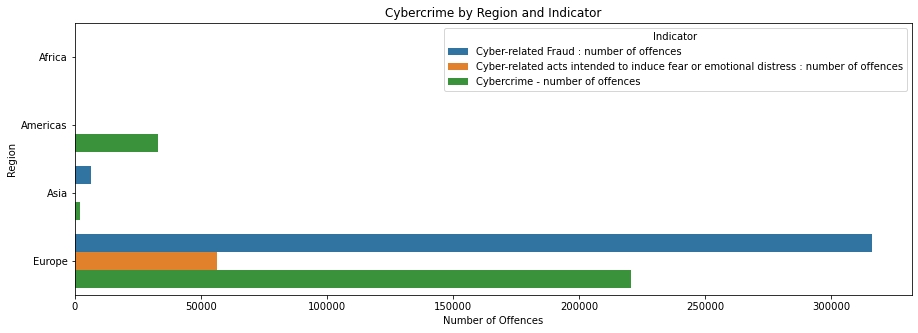

In [97]:
# Aggregation by region and indicator
region_data = df.groupby(['Region', 'Indicator']).sum().reset_index()

# Plot
plt.figure(figsize=(15, 5))
sns.barplot(x='Value', y='Region', hue='Indicator', data=region_data)
plt.xlabel("Number of Offences")
plt.title('Cybercrime by Region and Indicator')
plt.legend(title='Indicator')
plt.show()

## Cyber crimes in different sub regions

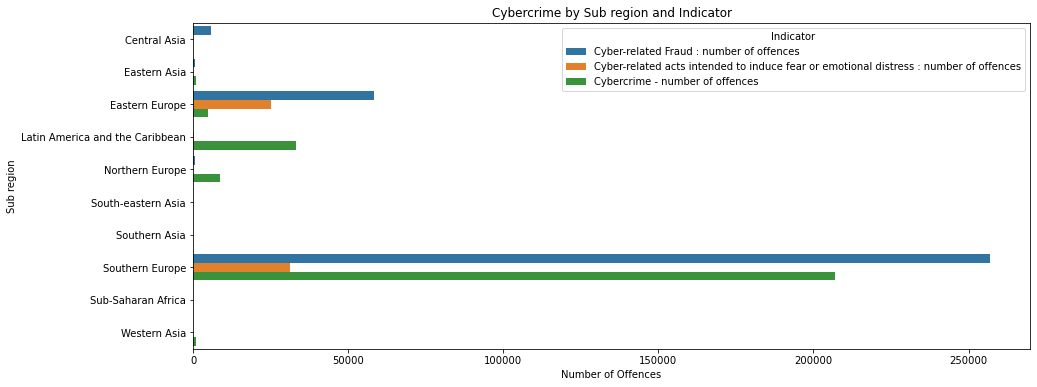

In [96]:
# Aggregation by sub region and indicator
sub_region_data = df.groupby(['Sub region', 'Indicator']).sum().reset_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Value', y='Sub region', hue='Indicator', data=sub_region_data)
plt.xlabel("Number of Offences")
plt.title('Cybercrime by Sub region and Indicator')
plt.legend(title='Indicator')
plt.show()

## Cyber crimes in different countries

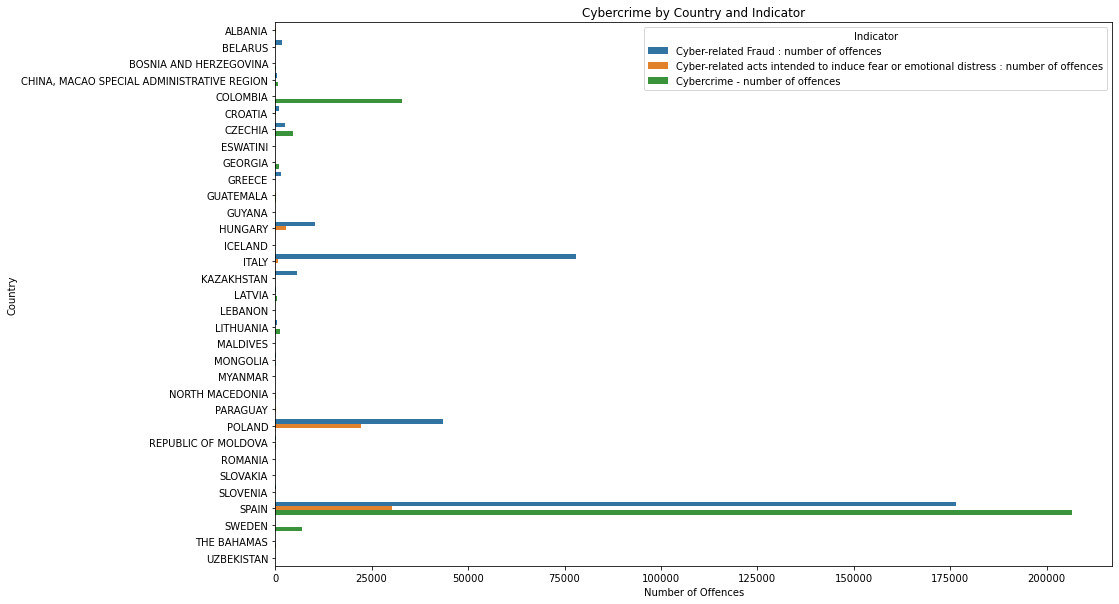

In [95]:
# Aggregation by Country and indicator
country_data = df.groupby(['Country', 'Indicator']).sum().reset_index()

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Value', y='Country', hue='Indicator', data=country_data)
plt.xlabel("Number of Offences")
plt.title('Cybercrime by Country and Indicator')
plt.legend(title='Indicator')
plt.show()

## Number of different cyber crimes

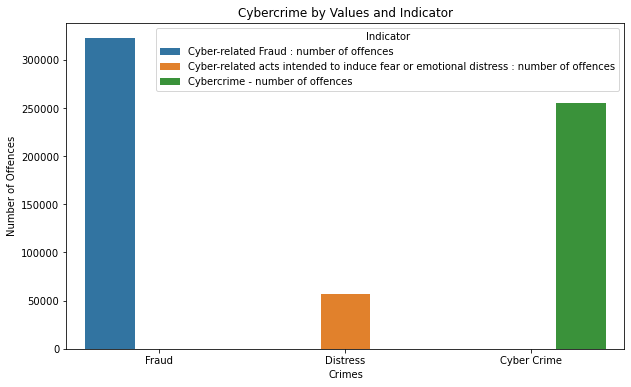

In [94]:
aliases = {
    "Cyber-related Fraud : number of offences":"Fraud",
    "Cyber-related acts intended to induce fear or emotional distress : number of offences":"Distress",
    "Cybercrime - number of offences":"Cyber Crime"
}

# Aggregation by Country and indicator
indicator_data = df.groupby(['Indicator']).sum().reset_index()

indicator_data['Crimes'] = indicator_data['Indicator'].map(aliases)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Crimes', y='Value', hue='Indicator', data=indicator_data)
plt.ylabel("Number of Offences")
plt.title('Cybercrime by Values and Indicator')
plt.legend(title='Indicator')
plt.show()

## Different types of cyber crimes over the years

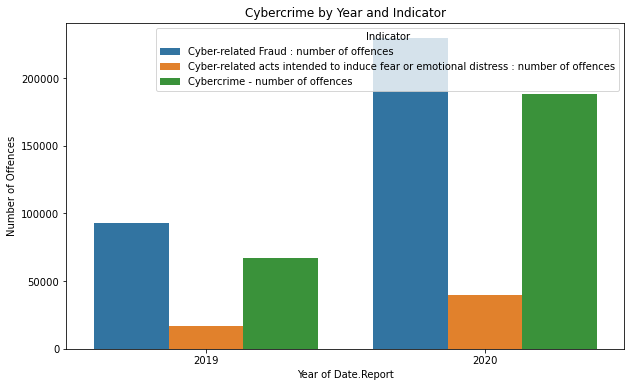

In [101]:
# Aggregation by year and indicator
yearly_data = df.groupby(['Year of Date.Report', 'Indicator']).sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year of Date.Report', y='Value', hue='Indicator', data=yearly_data)
plt.ylabel("Number of Offences")
plt.title('Cybercrime by Year and Indicator')
plt.legend(title='Indicator')
plt.show()

## Cyber crime in Colombia from 2019-2020

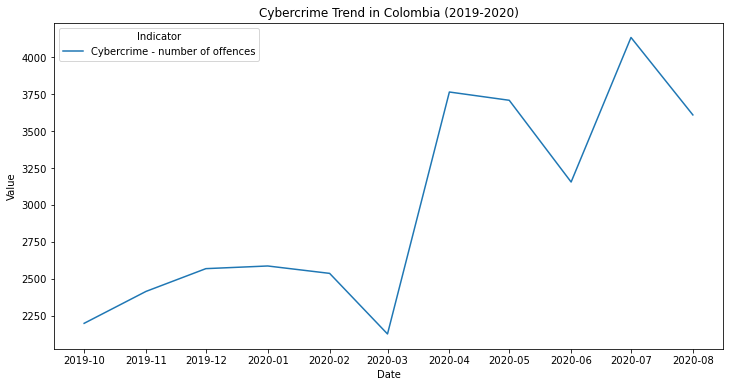

In [100]:
colombia_data = df[df['Country'] == 'COLOMBIA']
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Value', hue='Indicator', data=colombia_data)
plt.title('Cybercrime Trend in Colombia (2019-2020)')
plt.show()